In [356]:
import pandas as pd
import numpy as np
import time, os
import matplotlib.pyplot as plt 
import seaborn as sns
import json
import datetime as dt

In [357]:
sensors = pd.read_csv('D:\\Air_Quality_health_Project\\data\\location_sensors.csv')
measurement = pd.read_csv('D:\\Air_Quality_health_Project\\data\\measurements.csv')
cases = pd.read_excel('D:\\Air_Quality_health_Project\\data\\Disease_case.xlsx')
population = pd.read_excel('D:\\Air_Quality_health_Project\\data\\States_population.xlsx')

In [358]:
population = pd.read_excel('D:\\Air_Quality_health_Project\\data\\States_population.xlsx')

In [359]:
population['Population_lakhs'] = (population['Population_millions'].str.split(' ').str[0]).astype(float)*10
population = population.drop('Population_millions', axis=1)

In [360]:
population.head()

,State,Population_lakhs
0,Uttar Pradesh,2350.0
1,Maharashtra,1250.0
2,Bihar,1300.0
3,West Bengal,1000.0
4,Madhya Pradesh,880.0


In [361]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             36 non-null     object 
 1   Population_lakhs  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [ ]:
measurement.head()

,Sensor_id,Value,DateTimeFrom,DateTimeTo
0,14969,1070.0,2020-01-01,2020-02-01
1,14969,1010.0,2020-02-01,2020-03-01
2,14969,656.0,2020-03-01,2020-04-01
3,14969,110.0,2020-04-01,2020-05-01
4,14969,174.0,2020-05-01,2020-06-01


In [363]:
measurement['DateTimeFrom'] = pd.to_datetime(measurement['DateTimeFrom'])
measurement['DateTimeTo'] = pd.to_datetime(measurement['DateTimeTo'])

In [364]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sensor_id     11684 non-null  int64         
 1   Value         11684 non-null  float64       
 2   DateTimeFrom  11684 non-null  datetime64[ns]
 3   DateTimeTo    11684 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 365.3 KB


In [365]:
measurement['Month'] = measurement['DateTimeFrom'].dt.month_name()

In [366]:
measurement['Pollutant_value'] = measurement['Value']

In [367]:
measurement = measurement.drop("Value", axis=1)

In [368]:
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location_id  1145 non-null   int64  
 1   Sensor_id    1145 non-null   int64  
 2   State        1145 non-null   object 
 3   Area         1145 non-null   object 
 4   Sensor_name  1145 non-null   object 
 5   Latitude     1145 non-null   float64
 6   Longitude    1145 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.7+ KB


In [369]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             288 non-null    object 
 1   Month             288 non-null    object 
 2   Asthama_Cases     288 non-null    float64
 3   Bronchitis_Cases  288 non-null    int64  
 4   Heart_attacks     288 non-null    float64
 5   COPD_Cases        288 non-null    int64  
 6   Neumonia_Cases    288 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 15.9+ KB


In [370]:
numeric = cases.select_dtypes(['int64', 'float64']).columns
cases[numeric] = cases[numeric].round().astype('int64')

In [371]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             288 non-null    object
 1   Month             288 non-null    object
 2   Asthama_Cases     288 non-null    int64 
 3   Bronchitis_Cases  288 non-null    int64 
 4   Heart_attacks     288 non-null    int64 
 5   COPD_Cases        288 non-null    int64 
 6   Neumonia_Cases    288 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 15.9+ KB


In [372]:
measurement.shape

(11684, 5)

In [373]:
sensor_cases = sensors.merge(population, on= 'State', how= 'left')

In [374]:
sensor_cases = sensor_cases.merge(cases, on= 'State')

In [375]:
sensor_cases.head()

,Location_id,Sensor_id,State,Area,Sensor_name,Latitude,Longitude,Population_lakhs,Month,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases
0,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,January,6400,11016,1150,16300,4550
1,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,February,6400,10098,1100,14940,3900
2,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,March,7200,8262,1200,13590,3900
3,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,April,5600,6426,1300,10860,3900
4,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,May,4800,5508,1250,9505,4550


In [376]:
measurement.shape, sensor_cases.shape

((11684, 5), (13740, 14))

In [377]:
Data = sensor_cases.merge(measurement, on= ['Sensor_id', 'Month'], how='left')

In [378]:
Data.head()

,Location_id,Sensor_id,State,Area,Sensor_name,Latitude,Longitude,Population_lakhs,Month,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases,DateTimeFrom,DateTimeTo,Pollutant_value
0,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,January,6400,11016,1150,16300,4550,2020-01-01,2020-02-01,1070.0
1,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,February,6400,10098,1100,14940,3900,2020-02-01,2020-03-01,1010.0
2,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,March,7200,8262,1200,13590,3900,2020-03-01,2020-04-01,656.0
3,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,April,5600,6426,1300,10860,3900,2020-04-01,2020-05-01,110.0
4,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,May,4800,5508,1250,9505,4550,2020-05-01,2020-06-01,174.0


In [379]:
Data.dropna(axis=0, inplace=True)

In [380]:
Data.loc[Data['Pollutant_value'] < 0, ['Pollutant_value']] = 0

In [381]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11574 entries, 0 to 13739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location_id       11574 non-null  int64         
 1   Sensor_id         11574 non-null  int64         
 2   State             11574 non-null  object        
 3   Area              11574 non-null  object        
 4   Sensor_name       11574 non-null  object        
 5   Latitude          11574 non-null  float64       
 6   Longitude         11574 non-null  float64       
 7   Population_lakhs  11574 non-null  float64       
 8   Month             11574 non-null  object        
 9   Asthama_Cases     11574 non-null  int64         
 10  Bronchitis_Cases  11574 non-null  int64         
 11  Heart_attacks     11574 non-null  int64         
 12  COPD_Cases        11574 non-null  int64         
 13  Neumonia_Cases    11574 non-null  int64         
 14  DateTimeFrom      11574 non

In [382]:
Data.State.value_counts()

State
Delhi (NCT)       2056
Haryana           1568
Maharashtra       1163
Uttar Pradesh     1003
Karnataka          990
Madhya Pradesh     773
West Bengal        661
Rajasthan          540
Bihar              528
Kerala             460
Punjab             420
Telangana          303
Tamil Nadu         240
Andhra Pradesh     240
Gujarat            240
Odisha             120
Assam               65
Meghalaya           60
Jharkhand           55
Mizoram             50
Nagaland            20
Tripura             10
Chhattisgarh         9
Name: count, dtype: int64

In [383]:
Data.Sensor_name.value_counts()

Sensor_name
pm25 µg/m³    2402
no2 µg/m³     2385
co µg/m³      2346
so2 µg/m³     2282
pm10 µg/m³    2159
Name: count, dtype: int64

In [384]:
Data.Month.value_counts()

Month
December     1114
November     1069
September     969
October       964
August        957
July          952
June          951
April         941
March         941
May           937
February      904
January       875
Name: count, dtype: int64

In [385]:
Data.describe()

,Location_id,Sensor_id,Latitude,Longitude,Population_lakhs,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases,DateTimeFrom,DateTimeTo,Pollutant_value
count,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574.000000,11574,11574,11574.000000
mean,7430.165371,23112.287368,23.677655,78.272416,764.485053,42682.631415,31547.336703,7707.003542,10747.361759,2862.057024,2020-06-22 05:30:12.130637568,2020-07-22 17:36:17.916018688,224.880030
min,301.000000,710.000000,8.514909,72.591912,13.000000,456.000000,313.000000,779.000000,230.000000,45.000000,2020-01-01 00:00:00,2020-02-01 00:00:00,0.000000
25%,5633.000000,15117.500000,19.137500,76.281342,290.000000,12000.000000,1380.000000,1236.000000,4200.000000,880.000000,2020-04-01 00:00:00,2020-05-01 00:00:00,16.100000
50%,6956.000000,20071.000000,25.619651,77.237738,700.000000,22000.000000,10200.000000,2500.000000,9300.000000,1400.000000,2020-07-01 00:00:00,2020-08-01 00:00:00,43.850000
75%,8475.000000,34821.000000,28.636429,78.451437,1000.000000,60000.000000,34391.000000,11636.000000,15000.000000,2400.000000,2020-10-01 00:00:00,2020-11-01 00:00:00,161.000000
max,42240.000000,234638.000000,31.620000,94.098988,2350.000000,231000.000000,276000.000000,41500.000000,29900.000000,18500.000000,2020-12-01 00:00:00,2021-01-01 00:00:00,34400.000000
std,2328.680279,10363.601012,5.995684,4.191024,611.918180,44805.411092,53720.644530,9880.211880,7513.992708,4084.442640,NaN,NaN,559.001208


In [386]:
Data.describe(exclude=['int64', 'float64', 'datetime64[ns]'])

,State,Area,Sensor_name,Month
count,11574,11574,11574,11574
unique,23,231,5,12
top,Delhi (NCT),Shastri Nagar,pm25 µg/m³,December
freq,2056,120,2402,1114


In [387]:
def get_aqi_category(pollutant, value):
    if pd.isnull(value) or pd.isnull(pollutant):
        return 'Unknown'
    try:
        if pollutant == 'pm25 µg/m³':
            if value <= 30: return 'Good'
            elif value <= 60: return 'Satisfactory'
            elif value <= 90: return 'Moderate'
            elif value <= 120: return 'Poor'
            elif value <= 250: return 'Very Poor'
            else: return 'Severe'
            
        elif pollutant == 'pm10 µg/m³':
            if value <= 50: return 'Good'
            elif value <= 100: return 'Satisfactory'
            elif value <= 250: return 'Moderate'
            elif value <= 350: return 'Poor'
            elif value <= 430: return 'Very Poor'
            else: return 'Severe'
            
        elif pollutant == 'no2 µg/m³':
            if value <= 40: return 'Good'
            elif value <= 80: return 'Satisfactory'
            elif value <= 180: return 'Moderate'
            elif value <= 280: return 'Poor'
            elif value <= 400: return 'Very Poor'
            else: return 'Severe'
            
        elif pollutant == 'so2 µg/m³':
            if value <= 40: return 'Good'
            elif value <= 80: return 'Satisfactory'
            elif value <= 380: return 'Moderate'
            elif value <= 800: return 'Poor'
            elif value <= 1600: return 'Very Poor'
            else: return 'Severe'
            
        elif pollutant == 'co µg/m³':
            if value <= 1: return 'Good'
            elif value <= 2: return 'Satisfactory'
            elif value <= 10: return 'Moderate'
            elif value <= 17: return 'Poor'
            elif value <= 34: return 'Very Poor'
            else: return 'Severe'
    except:        
        return 'Unknown'


In [388]:
Data['AQI_category'] =  Data.apply(lambda X: get_aqi_category(X['Sensor_name'], X['Pollutant_value']),axis= 1)

In [389]:
Data_pivot = Data.pivot_table(index=['State', 'Month'],
                 columns='Sensor_name',
                 values='Pollutant_value',
                 aggfunc='mean').reset_index()

In [390]:
Data_pivot = Data_pivot.round(2)

In [391]:
Data.head()

,Location_id,Sensor_id,State,Area,Sensor_name,Latitude,Longitude,Population_lakhs,Month,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases,DateTimeFrom,DateTimeTo,Pollutant_value,AQI_category
0,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,January,6400,11016,1150,16300,4550,2020-01-01,2020-02-01,1070.0,Severe
1,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,February,6400,10098,1100,14940,3900,2020-02-01,2020-03-01,1010.0,Severe
2,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,March,7200,8262,1200,13590,3900,2020-03-01,2020-04-01,656.0,Severe
3,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,April,5600,6426,1300,10860,3900,2020-04-01,2020-05-01,110.0,Severe
4,5628,14969,Andhra Pradesh,GVM Corporation,co µg/m³,17.722682,83.308197,540.0,May,4800,5508,1250,9505,4550,2020-05-01,2020-06-01,174.0,Severe


In [392]:
case_per_lakh = cases.copy()

In [393]:
case_per_lakh['Asthama_Cases'] = Data['Asthama_Cases']/(Data['Population_lakhs'])
case_per_lakh['Bronchitis_Cases'] = Data['Bronchitis_Cases']/(Data['Population_lakhs'])
case_per_lakh['COPD_Cases'] = Data['COPD_Cases']/(Data['Population_lakhs'])
case_per_lakh['Heart_attacks'] = Data['Heart_attacks']/(Data['Population_lakhs'])
case_per_lakh['Neumonia_Cases'] = Data['Neumonia_Cases']/(Data['Population_lakhs'])

In [394]:
case_per_lakh

,State,Month,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases
0,Andhra Pradesh,January,11.851852,20.400000,2.129630,30.185185,8.425926
1,Andhra Pradesh,February,11.851852,18.700000,2.037037,27.666667,7.222222
2,Andhra Pradesh,March,13.333333,15.300000,2.222222,25.166667,7.222222
3,Andhra Pradesh,April,10.370370,11.900000,2.407407,20.111111,7.222222
4,Andhra Pradesh,May,8.888889,10.200000,2.314815,17.601852,8.425926
...,...,...,...,...,...,...,...
283,Tripura,August,182.666667,29.166667,11.805556,17.222222,4.444444
284,Tripura,September,161.777778,34.027778,11.805556,18.055556,4.166667
285,Tripura,October,161.777778,38.888889,12.738889,18.888889,3.888889
286,Tripura,November,161.777778,38.888889,12.738889,20.833333,3.611111


In [395]:
Data_pivot = Data_pivot.merge(case_per_lakh, on= ["State", 'Month'], how="left")

In [396]:
Data_pivot = Data_pivot.round(2)

In [397]:
Data_pivot.head()

,State,Month,co µg/m³,no2 µg/m³,pm10 µg/m³,pm25 µg/m³,so2 µg/m³,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases
0,Andhra Pradesh,April,278.55,11.56,38.25,16.08,13.26,10.37,11.9,2.41,20.11,7.22
1,Andhra Pradesh,August,488.25,12.76,39.05,14.43,3882.38,8.89,10.2,2.22,20.11,16.85
2,Andhra Pradesh,December,895.75,23.82,124.20,71.62,103.28,13.33,18.7,2.22,32.69,7.22
3,Andhra Pradesh,February,694.25,25.75,72.18,37.45,19.15,11.85,18.7,2.04,27.67,7.22
4,Andhra Pradesh,January,706.50,24.70,83.60,47.92,15.76,11.85,20.4,2.13,30.19,8.43


In [398]:
Data_pivot.sort_values(by='so2 µg/m³')

,State,Month,co µg/m³,no2 µg/m³,pm10 µg/m³,pm25 µg/m³,so2 µg/m³,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases
159,Odisha,April,1256.50,4.87,99.05,50.00,3.08,10.37,11.90,2.41,20.11,7.22
108,Kerala,September,826.75,8.87,26.96,15.46,4.10,11.85,11.90,2.31,22.63,13.24
138,Meghalaya,July,120.00,2.76,6.86,6.14,4.11,161.78,24.31,11.81,16.67,4.72
107,Kerala,October,1054.00,11.00,51.16,23.41,4.40,14.81,15.30,2.41,25.17,8.43
148,Mizoram,July,128.00,0.19,6.49,0.39,4.44,5.93,10.20,2.13,17.60,16.85
...,...,...,...,...,...,...,...,...,...,...,...,...
11,Andhra Pradesh,September,531.25,17.58,39.88,17.65,626.93,11.85,11.90,2.31,22.63,13.24
207,Telangana,April,478.67,34.55,63.22,31.58,692.08,10.37,11.90,2.41,20.11,7.22
9,Andhra Pradesh,November,711.50,18.48,79.95,42.50,1523.30,14.81,18.70,2.31,27.67,7.22
1,Andhra Pradesh,August,488.25,12.76,39.05,14.43,3882.38,8.89,10.20,2.22,20.11,16.85


In [399]:
Data_pivot = Data_pivot[Data_pivot['so2 µg/m³'] < 150].sort_values(by='so2 µg/m³')

In [420]:
Data = pd.read_excel('D:\\Air_Quality_health_Project\\data\\clean_data\\AQI_Cases_data.xlsx')
Data_pivot = pd.read_excel('D:\\Air_Quality_health_Project\\data\\clean_data\\Data_pivot.xlsx')

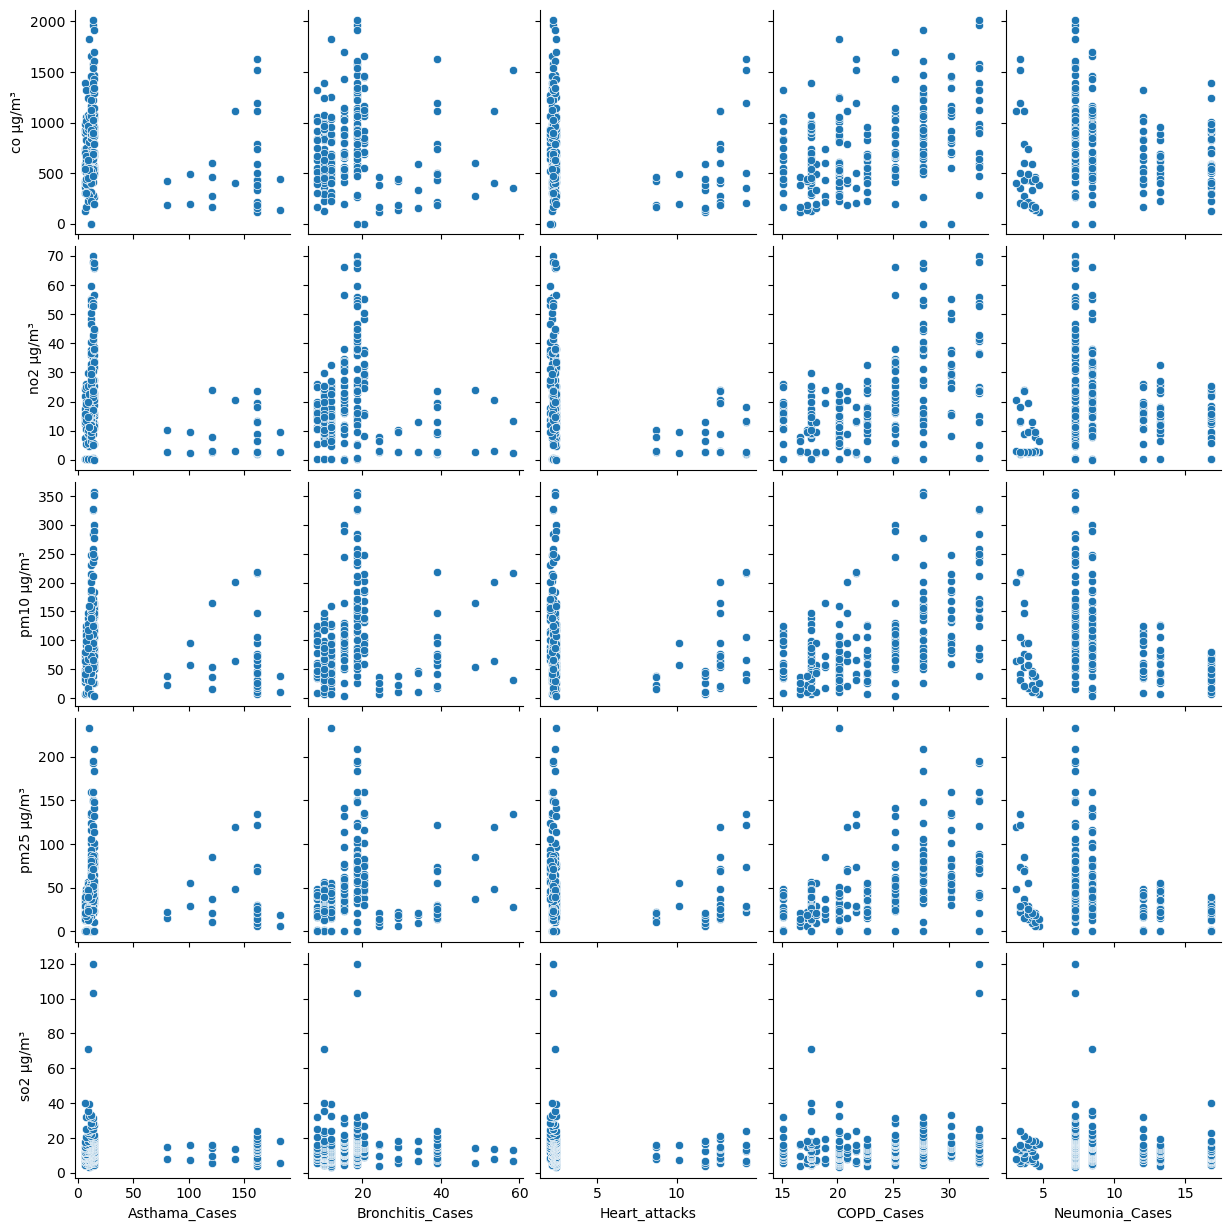

In [421]:
sns.pairplot(
    Data_pivot,
    x_vars=['Asthama_Cases', 'Bronchitis_Cases', 'Heart_attacks', 'COPD_Cases', 'Neumonia_Cases'],
    y_vars= ['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³'],
    )

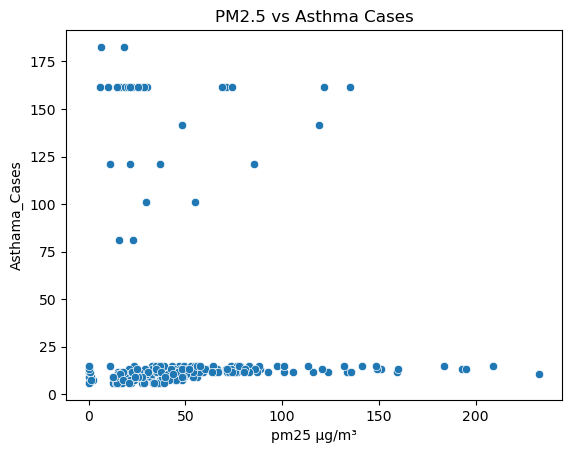

In [422]:
sns.scatterplot(data=Data_pivot, x='pm25 µg/m³', y='Asthama_Cases')
plt.title('PM2.5 vs Asthma Cases')
plt.show()

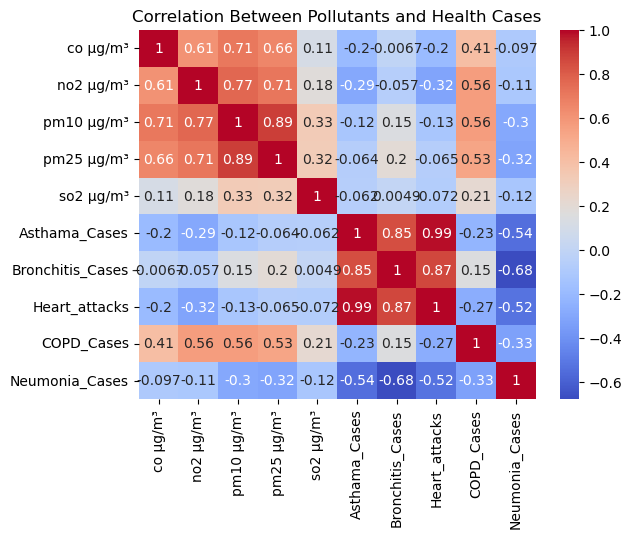

In [423]:
corr = Data_pivot.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and Health Cases")
plt.show()

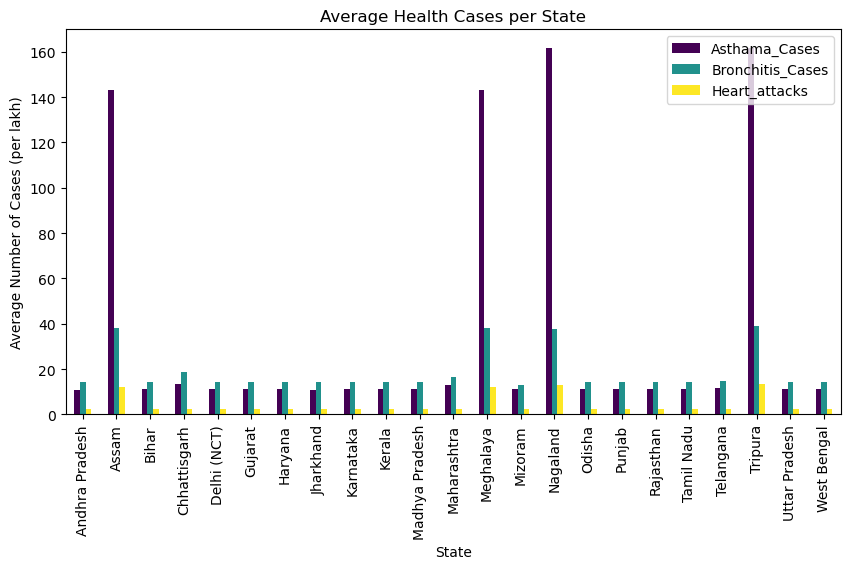

In [ ]:
df_grouped = Data_pivot.groupby("State")[["Asthama_Cases", "Bronchitis_Cases", "Heart_attacks", ]].mean().reset_index()
df_grouped.plot(x="State", kind="bar", figsize=(10,5), colormap='viridis')
plt.title("Average Health Cases per State")
plt.ylabel("Average Number of Cases (per lakh)")
plt.show()

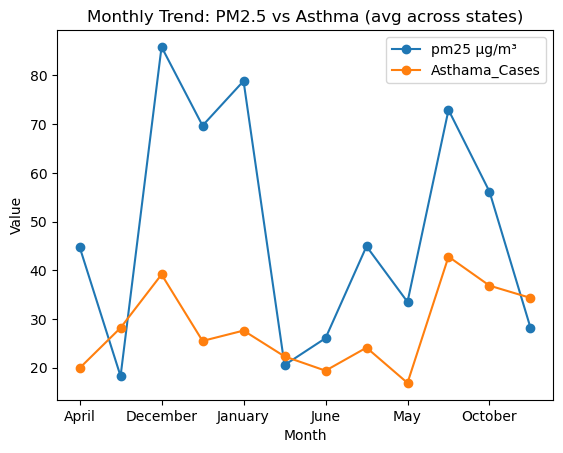

In [425]:
df_monthly = Data_pivot.groupby("Month")[["pm25 µg/m³", "Asthama_Cases"]].mean()
df_monthly.plot(marker='o')
plt.title("Monthly Trend: PM2.5 vs Asthma (avg across states)")
plt.ylabel("Value")
plt.show()

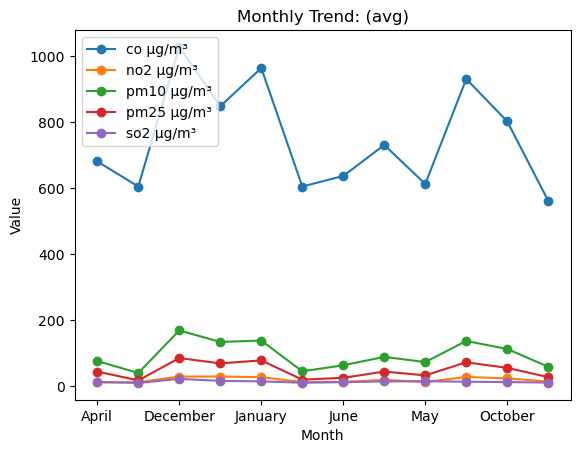

In [426]:
df_monthly = Data_pivot.groupby('Month')[['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³']].mean()
df_monthly.plot(marker='o')
plt.title("Monthly Trend: (avg)")
plt.ylabel("Value")
plt.show()

C:\Users\kanwa\AppData\Local\Temp\ipykernel_4476\56358344.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly = Data_pivot.groupby('Month')[['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³']].mean()


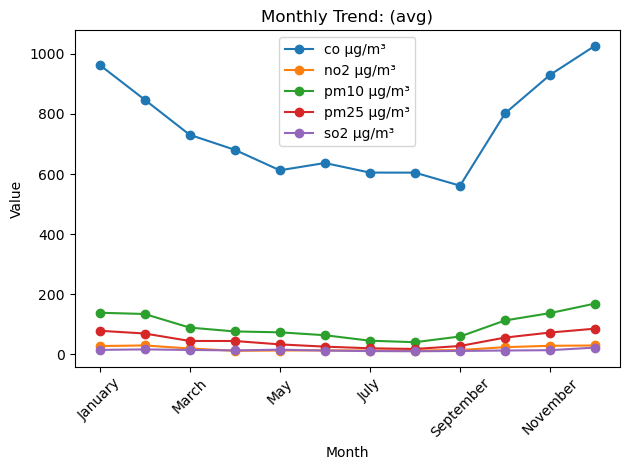

In [ ]:
# Define correct calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Now group and plot
df_monthly = Data_pivot.groupby('Month')[['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³']].mean()
df_monthly = df_monthly.loc[month_order]  # Ensure plot order

# Plot
df_monthly.plot(marker='o')
plt.title("Monthly Trend: (avg)")
plt.ylabel("Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

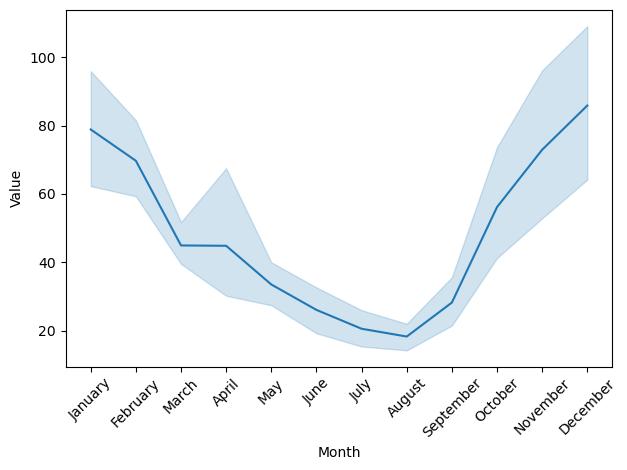

In [428]:
sns.lineplot(data=Data_pivot, x="Month", y="pm25 µg/m³")
plt.ylabel("Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='pm25 µg/m³', ylabel='Asthama_Cases'>

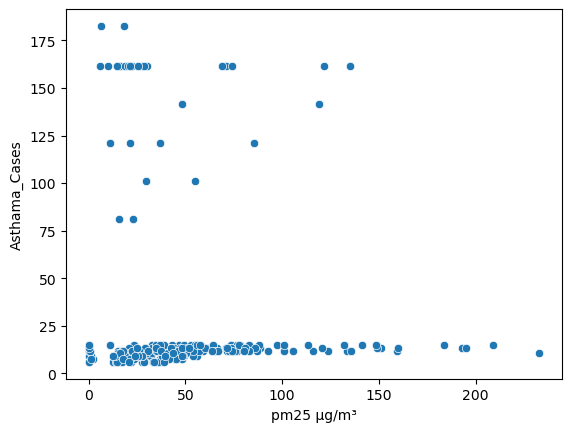

In [429]:
sns.scatterplot(data=Data_pivot, x="pm25 µg/m³", y="Asthama_Cases")

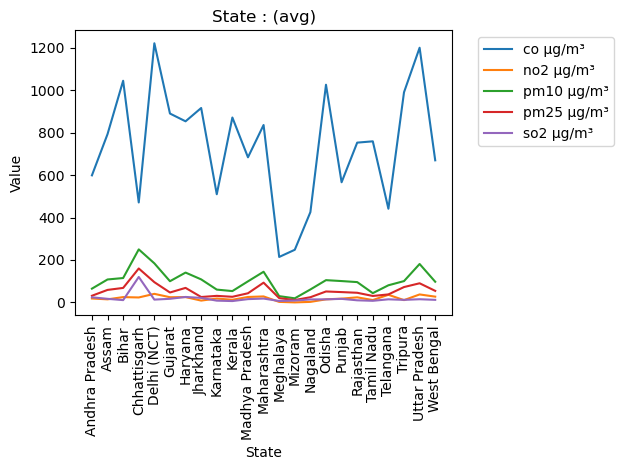

In [ ]:
df_state = Data_pivot[['State', 'co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³']].groupby('State').mean()
x = list(range(len(df_state.index)))
plt.plot(x,df_state['co µg/m³'], label =  'co µg/m³'   )
plt.plot(x,df_state['no2 µg/m³'], label = 'no2 µg/m³'    )
plt.plot(x,df_state['pm10 µg/m³'], label =  'pm10 µg/m³'   )
plt.plot(x,df_state['pm25 µg/m³'], label =  'pm25 µg/m³'   )
plt.plot(x,df_state['so2 µg/m³'], label = 'so2 µg/m³'    )
plt.xticks(x, list(df_state.index), rotation=90)
plt.title("State : (avg)")
plt.ylabel("Value")
plt.xlabel("State")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [468]:
Data_pivot['Pollution_index'] = Data_pivot[['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³', 'so2 µg/m³']].mean(axis=1)

C:\Users\kanwa\AppData\Local\Temp\ipykernel_4476\1644900208.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly = Data_pivot.groupby('Month')[['Pollution_index']].mean()


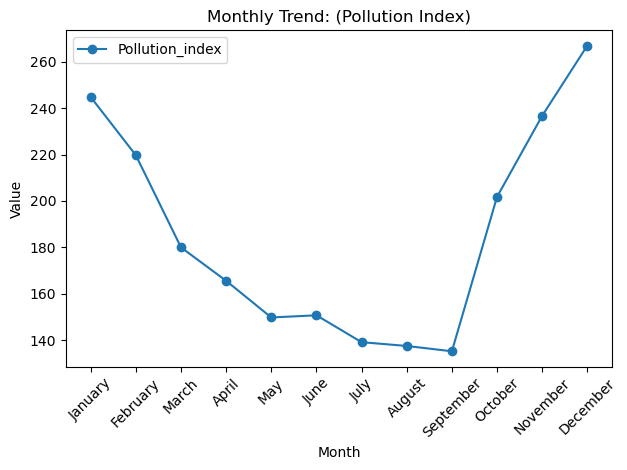

In [489]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Now group and plot
df_monthly = Data_pivot.groupby('Month')[['Pollution_index']].mean()
df_monthly = df_monthly.loc[month_order]  # Ensure plot order

x = list(range(12))
df_monthly.plot(marker='o')
plt.title("Monthly Trend: (Pollution Index)")
plt.ylabel("Value")
plt.xlabel("Month")
plt.xticks(x,month_order ,rotation=45)
plt.tight_layout()
plt.show()

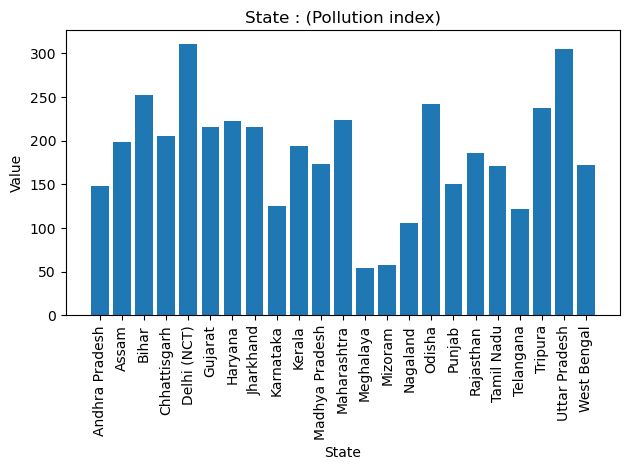

In [488]:
x = list(range(23))
plt.bar(x,Data_pivot.groupby('State')['Pollution_index'].mean())
plt.xticks(x, list(df_state.index), rotation=90)
plt.title("State : (Pollution index)")
plt.ylabel("Value")
plt.xlabel("State")
plt.tight_layout()
plt.show()

In [493]:
Data_pivot['Disease_index'] = Data_pivot[['Asthama_Cases', 'Bronchitis_Cases', 'Heart_attacks', 'COPD_Cases', 'Neumonia_Cases']].mean(axis=1)


C:\Users\kanwa\AppData\Local\Temp\ipykernel_4476\3267014113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly = Data_pivot.groupby('Month')[['Disease_index']].mean()


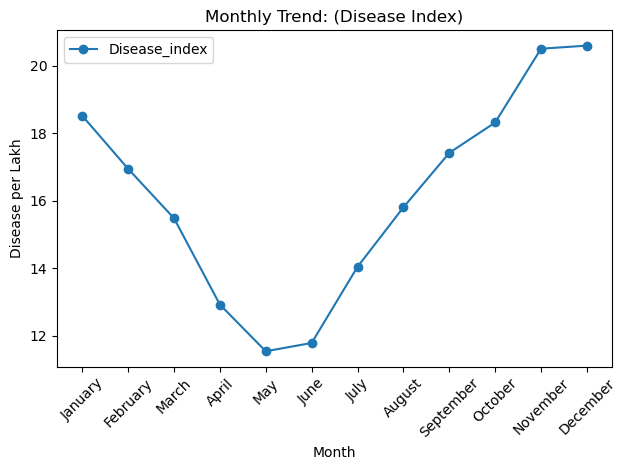

In [495]:
df_monthly = Data_pivot.groupby('Month')[['Disease_index']].mean()
df_monthly = df_monthly.loc[month_order]  # Ensure plot order

x = list(range(12))
df_monthly.plot(marker='o')
plt.title("Monthly Trend: (Disease Index)")
plt.ylabel("Disease per Lakh")
plt.xlabel("Month")
plt.xticks(x,month_order ,rotation=45)
plt.tight_layout()
plt.show()